In [12]:
import os
import sys
sys.path.append(os.getcwd()+"/../..")
from src import paths

from sklearn.metrics import classification_report
from src.utils import plot_confusion_matrix, line_label_id2label, line_Label_label2id, performance_metrics, plot_embeddings, get_df_classificationreport

import torch

In [3]:
results = torch.load(paths.RESULTS_PATH/"line-label"/"line-label_medbert-512_finetuned_512.pt")
labels = results["labels"]
last_hidden_state = results["last_hidden_state"]
preds = results["preds"]

In [4]:
# Last hidden stats is list of tensors, each tensor is (seq_len, hidden_size). Will take CLS token
cls_tokens = [tensor[0,:] for tensor in last_hidden_state]

embeddings = torch.stack(cls_tokens, dim = 0)

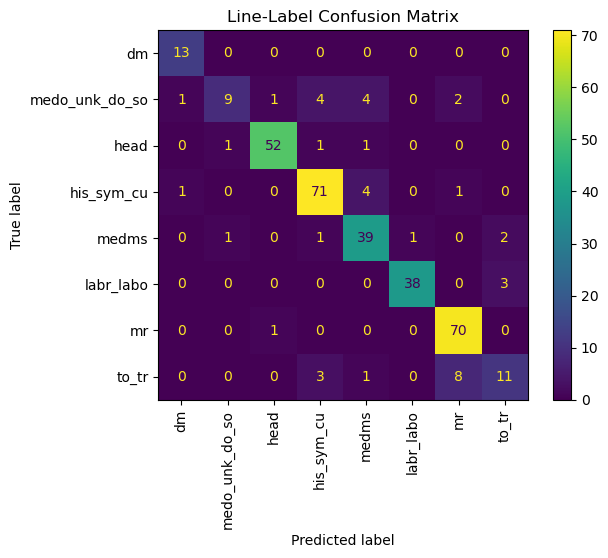

In [5]:
plot_confusion_matrix(preds=preds, labels=labels, title="Line-Label Confusion Matrix", label2id=line_Label_label2id)

In [6]:
y_valid = [line_label_id2label[label] for label in labels]
y_pred = [line_label_id2label[pred] for pred in preds]
get_df_classificationreport(y_valid, y_pred, labels = sorted(line_label_id2label.values()))

,eval_measure,precision,recall,f1-score,support
0,dm,0.866667,1.000000,0.928571,13
1,head,0.962963,0.945455,0.954128,55
2,his_sym_cu,0.887500,0.922078,0.904459,77
3,labr_labo,0.974359,0.926829,0.950000,41
4,medms,0.795918,0.886364,0.838710,44
5,medo_unk_do_so,0.818182,0.428571,0.562500,21
6,mr,0.864198,0.985915,0.921053,71
7,to_tr,0.687500,0.478261,0.564103,23
8,accuracy,NaN,NaN,0.878261,345
9,macro avg,0.857161,0.821684,0.827940,345


(345, 2)


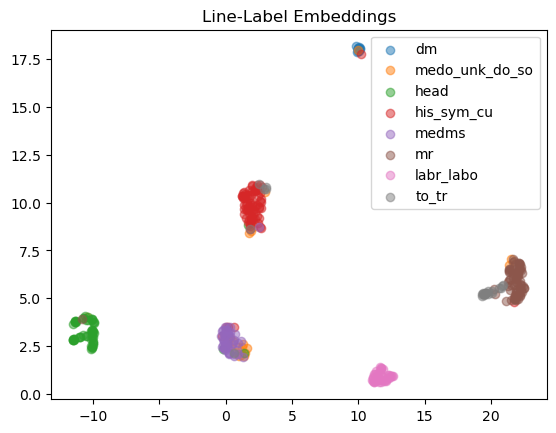

In [9]:
plot_embeddings(embeddings, [line_label_id2label[label] for label in labels], title="Line-Label Embeddings", method="umap", )

# MedBERT Token Classification

In [19]:
results = torch.load(paths.RESULTS_PATH/"line-label/line-label-token_medbert-512_finetuned_512.pt")
# results = torch.load(paths.RESULTS_PATH/"line-label/line-label_medbert-512_LORA_token_finetuned.pt")

In [15]:
results.keys()

dict_keys(['last_hidden_state', 'labels', 'preds'])

In [20]:
labels = results["labels"]
preds = results["preds"]

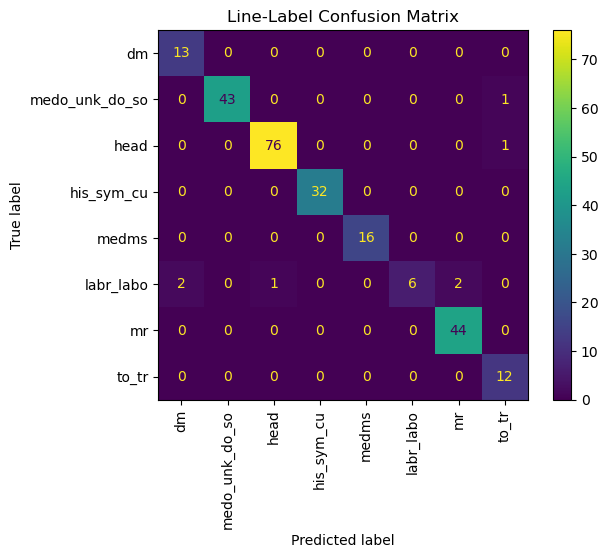

In [21]:
plot_confusion_matrix(preds=preds, labels=labels, title="Line-Label Confusion Matrix", label2id=line_Label_label2id)

In [22]:
get_df_classificationreport(labels, preds, labels = sorted(line_label_id2label.values()))

,eval_measure,precision,recall,f1-score,support
0,dm,0.866667,1.000000,0.928571,13
1,head,1.000000,0.977273,0.988506,44
2,his_sym_cu,0.987013,0.987013,0.987013,77
3,labr_labo,1.000000,1.000000,1.000000,32
4,medms,1.000000,1.000000,1.000000,16
5,medo_unk_do_so,1.000000,0.545455,0.705882,11
6,mr,0.956522,1.000000,0.977778,44
7,to_tr,0.857143,1.000000,0.923077,12
8,accuracy,NaN,NaN,0.971888,249
9,macro avg,0.958418,0.938718,0.938853,249
